In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
#plt.style.use('seaborn')

In [2]:
img1 = cv2.imread('gym_sid.jpg')
img2 = cv2.imread('road_sid.jpeg')

In [3]:
def display_images(image):
    fig, ax = plt.subplots(ncols=1, nrows = 1, figsize = (10,10))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)

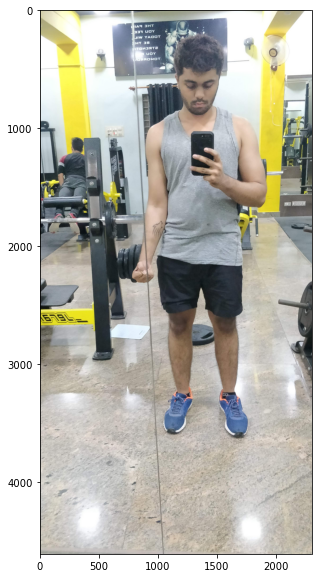

In [4]:
display_images(img1)

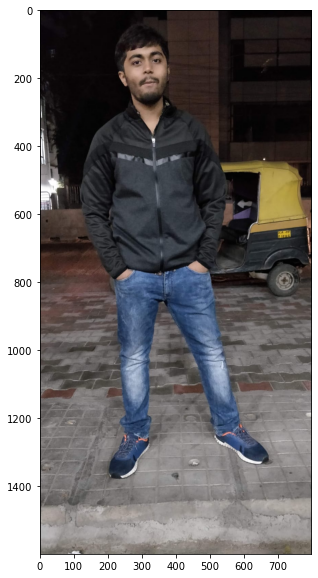

In [5]:
display_images(img2)

### performing histogram equalizations. 

In [6]:
def calc_intensities(image):
    """
    image: numpy array
    """
    colors = ['b','g','r']
    for index, color in enumerate(colors): 
        hist_temp = cv2.calcHist(images = [image], channels = [index], mask = None,histSize = [256],ranges = [0,256])
        plt.plot(hist_temp, color = color)
        plt.xlim([0,256])
    plt.show()
    

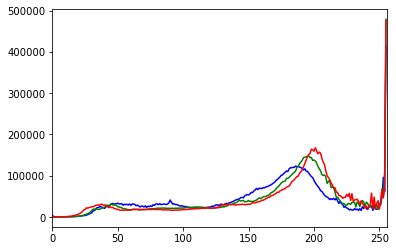

In [7]:
calc_intensities(img1)

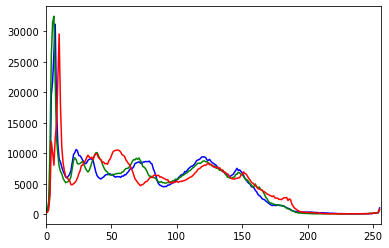

In [8]:
calc_intensities(img2)

In [9]:
# first things first in image 2 i can observe a vehicle behind me and I don't like it can i remove it 

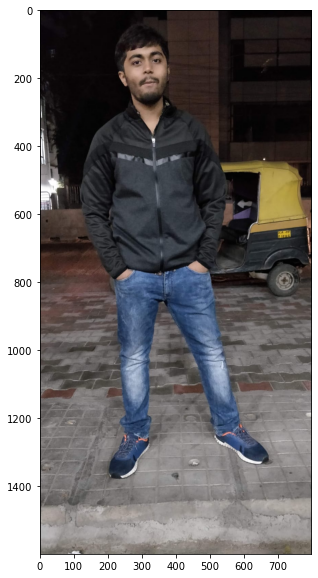

In [10]:
display_images(img2)

In [13]:
def find_roi(image):
    r = cv2.selectROI(image)
    # Crop image
    roi = int(r[1]),int(r[1]+r[3]), int(r[0]),int(r[0]+r[2])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return roi

In [16]:
img = img2.copy()
roi_to_remove = find_roi(img)
roi_to_add = find_roi(img)

In [16]:
roi_to_remove

(446, 847, 531, 783)

In [17]:
roi_to_add

(22, 378, 460, 771)

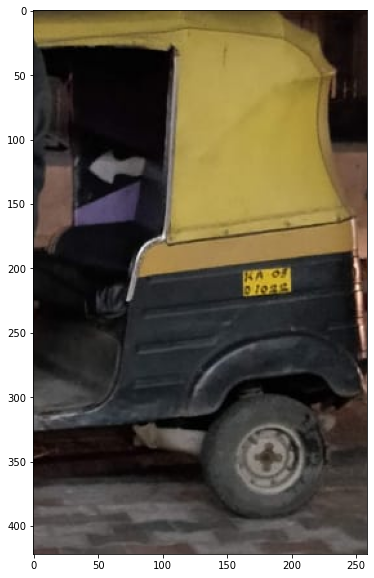

In [17]:
display_images(img[roi_to_remove[0]:roi_to_remove[1],roi_to_remove[2]:roi_to_remove[3]])

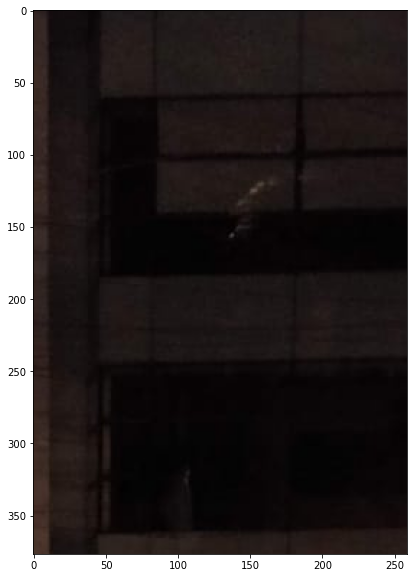

In [18]:
display_images(img[roi_to_add[0]:roi_to_add[1],roi_to_add[2]:roi_to_add[3]])

In [31]:
# lets blend these images 
src1 = img[roi_to_remove[0]:roi_to_remove[1],roi_to_remove[2]:roi_to_remove[3]]
src2 = img[roi_to_add[0]:roi_to_add[1],roi_to_add[2]:roi_to_add[3]]
src2 = cv2.resize(src2, (259,422))

In [32]:
src1.shape

(422, 259, 3)

In [33]:
src2.shape

(422, 259, 3)

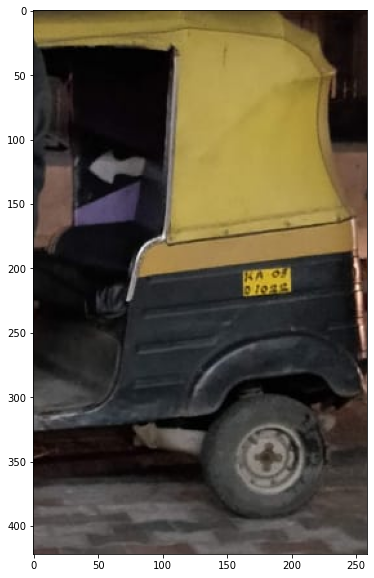

In [34]:
display_images(src1)

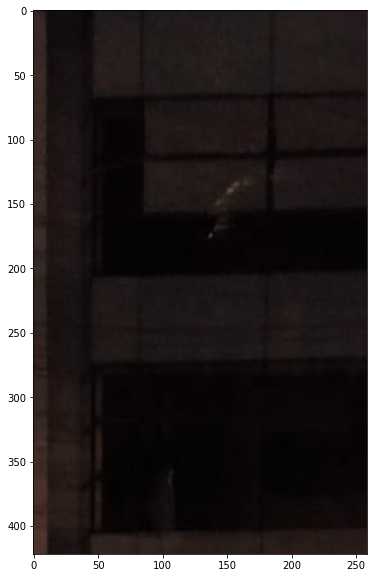

In [35]:
display_images(src2)

In [48]:
alpha = 0.2
beta = (1.0 - alpha)
dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)

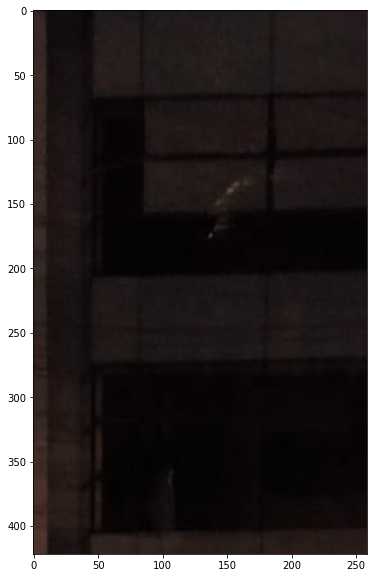

In [49]:
display_images(dst)

In [50]:
img[roi_to_remove[0]:roi_to_remove[1],roi_to_remove[2]:roi_to_remove[3]] = dst

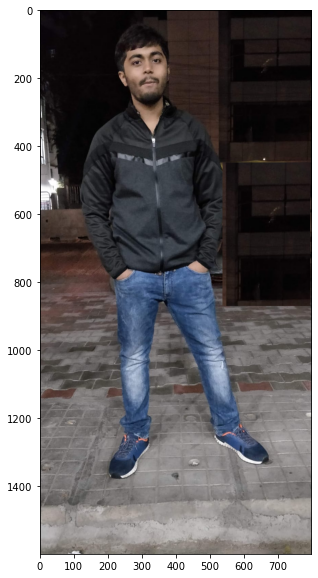

In [51]:
display_images(img)

In [54]:
hsv_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   
# grab the value channel 
hsv_img2[:,:,2] = cv2.equalizeHist(hsv_img2[:,:,2])
img_eq = cv2.cvtColor(hsv_img2, cv2.COLOR_HSV2BGR)

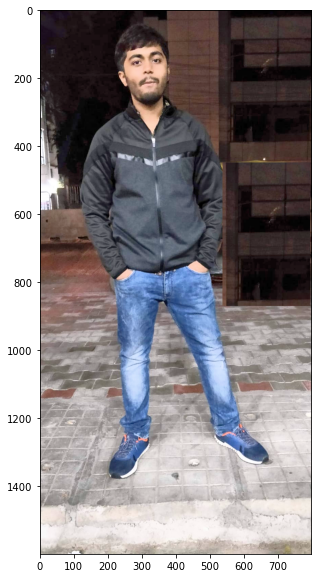

In [56]:
img2 = img_eq
display_images(img2)

In [109]:
temp_image_1 = img1.copy()
identity = np.arange(256, dtype = np.dtype('uint8'))
zeros = np.zeros(256, np.dtype('uint8'))
lut = np.dstack((identity, identity, zeros))

In [122]:
b_max = 100
temp_image_1[temp_image_1[:,:,0] > b_max,0] = b_max
#temp_image_1[:,:,0] = 77
#dstImage = cv2.LUT(temp_image_1, lut)

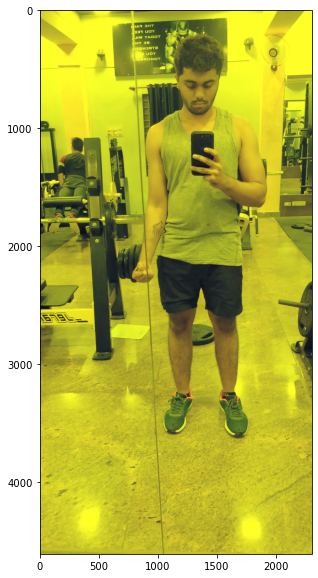

In [123]:
display_images(temp_image_1)

In [170]:
def apply_heat_filter(image, temp, b_max = 100):
    if temp == 'warm':
        # replace pixels in the image where the blue intensity of image is greater than the maximum permitted intensity 
        # with permitted intensity
        image[image[:,:,0] > b_max,0] = b_max
        return image
    elif temp == 'cool':
        #image[image[:,:,0] > b_max,0] = 65
        image[image[:,:,2] > b_max,2] = b_max
        #image[image[:,:,1] > b_max,1] = b_
        return image

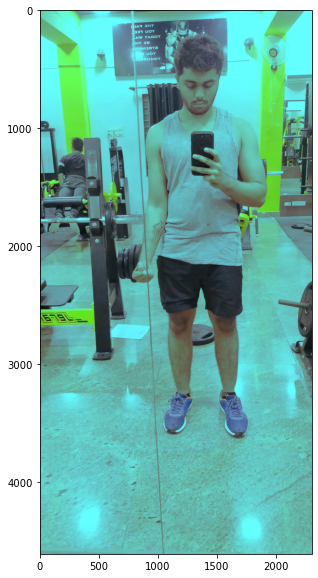

In [171]:
temp_image_1 = img1.copy()
display_images(apply_heat_filter(temp_image_1,'cool', b_max = 99))

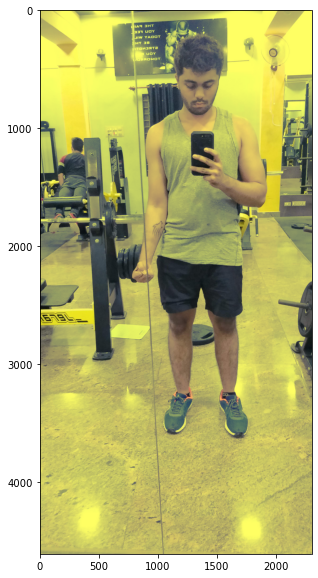

In [172]:
temp_image_1 = img1.copy()
display_images(apply_heat_filter(temp_image_1,'warm', b_max = 99))

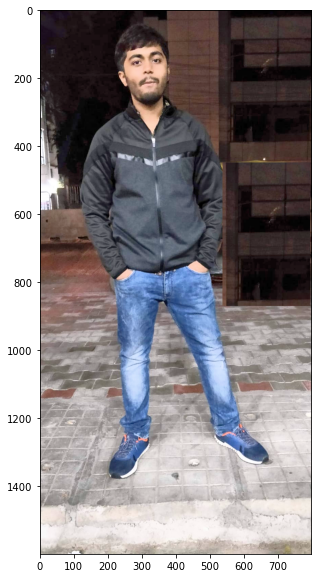

In [184]:
display_images(img2)

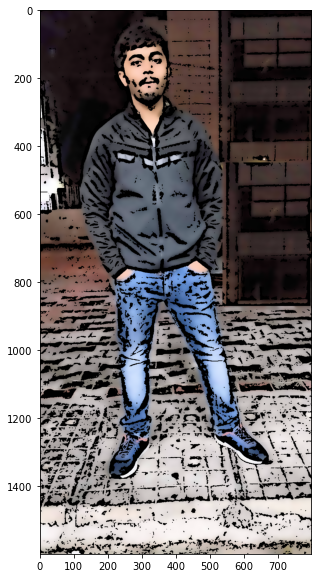

In [250]:
img2_temp = img2.copy()
gray = cv2.cvtColor(img2_temp, cv2.COLOR_BGR2GRAY) # convert to gray 
gray = cv2.medianBlur(gray,ksize = 3) # apply median blur 
edges = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,29,9) # threshold the image 
color = cv2.bilateralFilter(img2_temp,19,120,250) # apply bilateral filter 
cartoon = cv2.bitwise_and(color,color, mask = edges) # perform bitwise and 
display_images(cartoon)

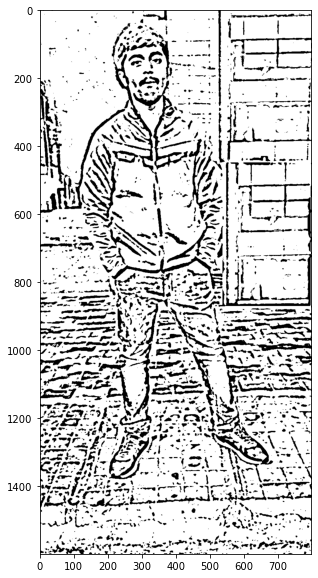

In [251]:
img1_temp = img2.copy()
gray = cv2.cvtColor(img1_temp, cv2.COLOR_BGR2GRAY) # convert to gray 
gray = cv2.medianBlur(gray,ksize = 5) # apply median blur 
edges = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,19,7) # threshold the image 
display_images(edges)

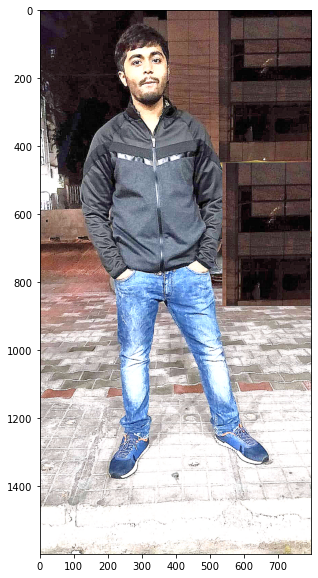

In [271]:
temp_img = img2.copy()
sharpening_kernel = np.array([[-1, -1,  -1],
                              [-1,  9.3, -1],
                              [-1, -1,  -1]]) 
sharp_img = cv2.filter2D(src=temp_img, ddepth=-1, kernel=sharpening_kernel)
display_images(sharp_img)

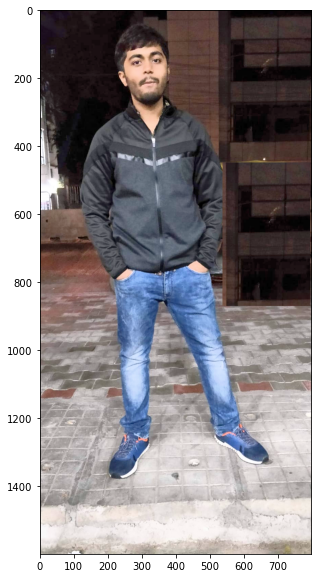

In [263]:
display_images(img2)

In [311]:
temp_img = img1.copy()

sepia_kernel = np.array([[0,-1,-1],
                            [1,0,-1],
                            [1,1,0]]) * 30
sepia_img = cv2.filter2D(src=temp_img, ddepth=-1, kernel=sepia_kernel)

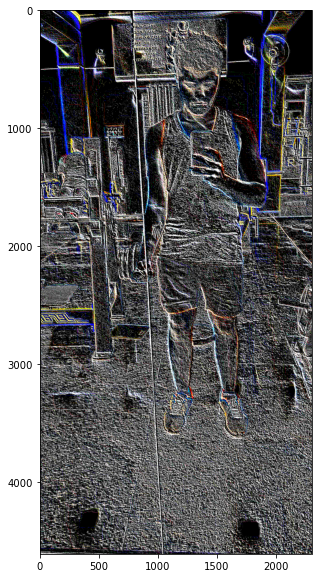